# Case 1: advanced analytics no mercado de vinhos
_________

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/3021e090-5a7e-4f0e-8298-4bfe5ce88206.webp" width=600>

Suponha que você é um cientista de dados que trabalha na área de *advanced analytics* de uma empresa especializada na distribuição e vendas de vinhos tintos. Naturalmente, a empresa está interessada em vender vinhos que sejam percebidos como bons por grande parte do público. Pensando nisso, foi feita uma pesquisa, na qual vinhos tintos com diferentes características físico-químicas foram oferecidos a alguns voluntários, que, após experimentá-los, deram notas de 0 a 10. A base coletada contém as seguintes informações:

- Medidas de 11 variáveis físico-químicas que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - fixed acidity - medida da acidez devido à presença de ácidos orgânicos de baixa volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho;
    - 2 - volatile acidity - medida da acidez devido a ácidos de baixo peso molecular (sobretudo ácido acético) presentes no vinho, que são responsáveis pelo aroma e gosto de vinagre;
    - 3 - citric acid - medida de ácido cítrico no vinho;
    - 4 - residual sugar - medida de açúcar residual presente no vinho, com origem nos resíduos de açúcar da uva que permanecem no vinho após o fim da fermentação;
    - 5 - chlorides - medida de cloretos (íons de cloro) no vinho;
    - 6 - free sulfur dioxide - medida de dióxido de enxofre livre (isto é, que não está ligado a outras moléculas) no vinho;
    - 7 - total sulfur dioxide - medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho;
    - 8 - density - medida da densidade do vinho;
    - 9 - pH - medida do pH do vinho;
    - 10 - sulphates - medida de sulfatos (íons SO₄²⁻) no vinho;
    - 11 - alcohol - medida da graduação alcoólica do vinho.
<br><br>
- Além disso, há a variável resposta que no caso é um score numérico:
<br><br>
    - 12 - quality - score numérico de qualidade (de 0 a 10), produzido com base em dados sensoriais.

Com base nestes dados coletados, o objetivo final será a construção de um modelo capaz de distinguir vinhos bons de ruins, com base nas medidas de suas características físico-químicas.

Uma vez que tenhamos este modelo, caso produtoras de vinho ofereçam um novo vinho para ser vendido por sua empresa, será possível decidir de maneira mais direcionada se vale a pena passar a vender este produto ou não, de acordo com a predição de sua qualidade dada pelo modelo.

Dentro deste contexto, seu objetivo como cientista de dados é claro:

> Agregar valor ao negócio, explorando os dados que você tem à disposição.

Mas, antes que um modelo possa ser construído, há diversas etapas importantes para que conheçamos os dados que temos disponíveis. Então, a tarefa deste case é: **realizar detalhada análise exploratória dos dados coletados**, de modo a entregar uma **formulação do problema final** a ser atacado por técnicas de machine learning em etapas futuras. Em particular, a principal pergunta que queremos responder é:

> Como utilizar os dados que temos para que possamos, em um momento posterior, criar um sistema capaz de **decidir** se um dado vinho será vendido por nossa empresa ou não?


_________

*Obs.: O enunciado acima foi apenas uma historinha que criei pra motivar o problema em um contexto de negócio. Para maiores informações sobre a coleta e origem real dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/datasets/wine+quality)*

_________



```
# Isto está formatado como código
```

### Analize Exploratoria!!

_______

1)
- Quantas linhas há no dataset?
- Quantas colunas há no dataset?
- Quais os tipos de dados em cada coluna?
- Há dados nulos (null, missing) na base?

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Verificação das dimensões do dataset
print(f"Dimensões do dataset: {df.shape}")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")


Dimensões do dataset: (1599, 12)
Número de linhas: 1599
Número de colunas: 12


In [6]:
# Verificação dos tipos de dados
print("Tipos de dados por coluna:")
print(df.dtypes)


Tipos de dados por coluna:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
# Informações gerais sobre o dataset
# O "Non-Null Count" quantifica os registros NÃO-NULOS (preenchidos)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Verificação de valores nulos
# Quantifica a quantidade de registros NULOS (vazios)
print("Quantidade de valores nulos por coluna:")
print(df.isnull().sum())


Quantidade de valores nulos por coluna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Conclusões Iniciais

✅ **Dataset carregado com sucesso!**

- **1.599 linhas** (observações de vinhos)
- **12 colunas** (11 características + 1 target)
- **Nenhum valor nulo** - dados completos
- **Tipos adequados**: float64 para features, int64 para quality

Os dados estão prontos para análise exploratória!


_______


## 2) Estatísticas Descritivas e Análise Exploratória

Utilizando a base de vinhos tintos, estude a distribuição das variáveis numéricas, calculando, para cada coluna, as principais estatísticas descritivas de posição (média, mediana, quartis, etc.) e de dispersão (std, IQR, etc.). Visualize as distribuições de cada variável na amostra.


In [9]:
# Estatísticas descritivas completas de todas as variáveis
print("📊 ESTATÍSTICAS DESCRITIVAS COMPLETAS")
print("="*50)
df.describe()


📊 ESTATÍSTICAS DESCRITIVAS COMPLETAS


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualizações das Distribuições das Variáveis

Vamos analisar a distribuição de cada variável através de histogramas:


📈 DISTRIBUIÇÕES DAS VARIÁVEIS


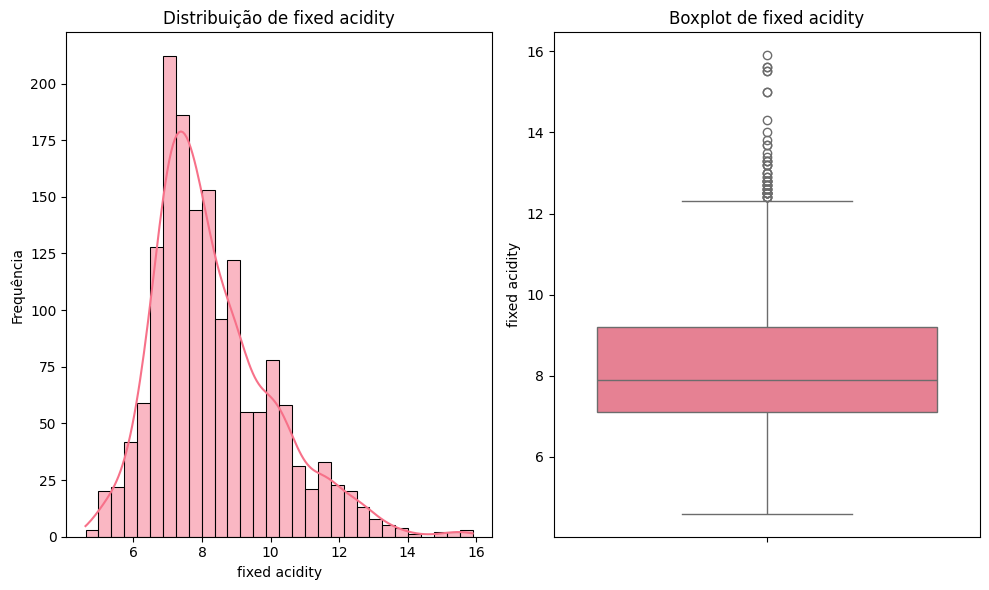


📊 FIXED ACIDITY:
   Média: 8.320
   Mediana: 7.900
   Desvio Padrão: 1.741
   Mín: 4.600 | Máx: 15.900
   Q1: 7.100 | Q3: 9.200
--------------------------------------------------


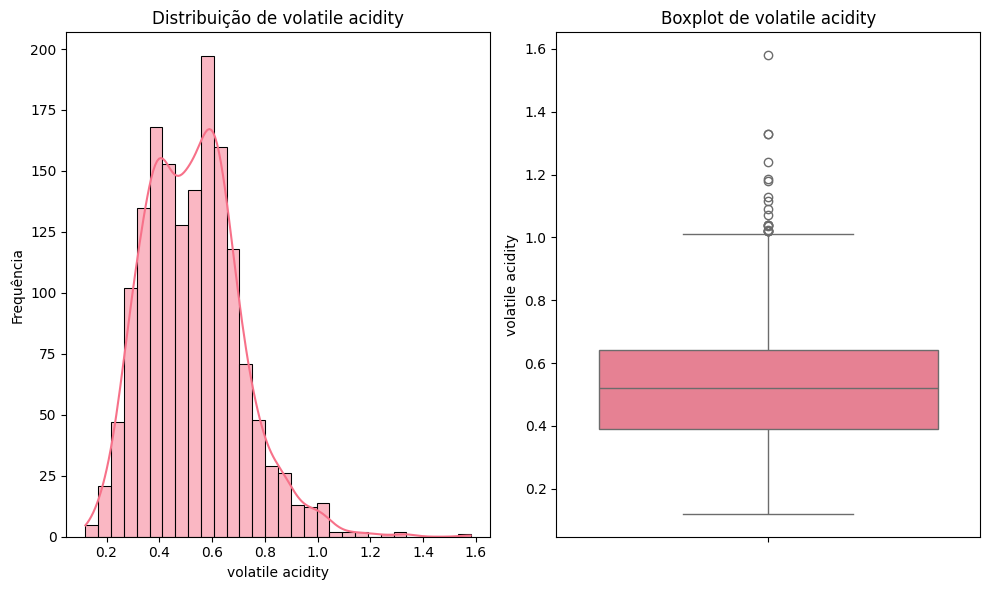


📊 VOLATILE ACIDITY:
   Média: 0.528
   Mediana: 0.520
   Desvio Padrão: 0.179
   Mín: 0.120 | Máx: 1.580
   Q1: 0.390 | Q3: 0.640
--------------------------------------------------


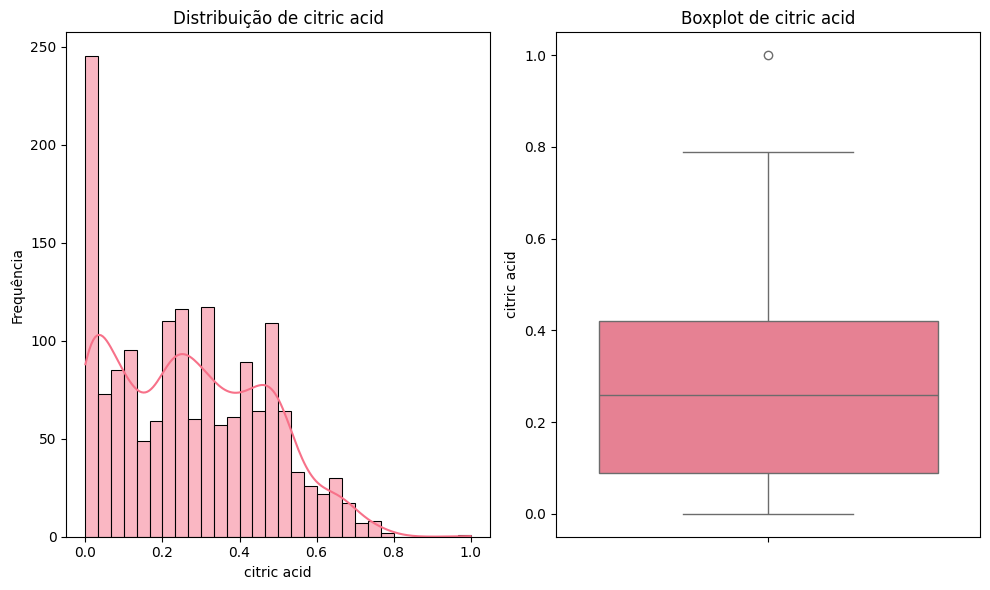


📊 CITRIC ACID:
   Média: 0.271
   Mediana: 0.260
   Desvio Padrão: 0.195
   Mín: 0.000 | Máx: 1.000
   Q1: 0.090 | Q3: 0.420
--------------------------------------------------


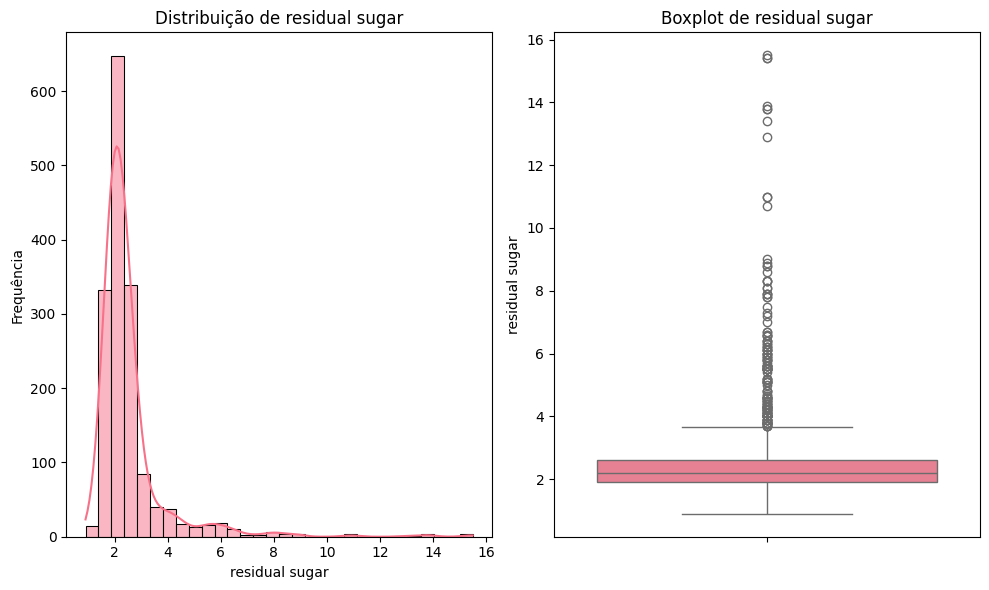


📊 RESIDUAL SUGAR:
   Média: 2.539
   Mediana: 2.200
   Desvio Padrão: 1.410
   Mín: 0.900 | Máx: 15.500
   Q1: 1.900 | Q3: 2.600
--------------------------------------------------


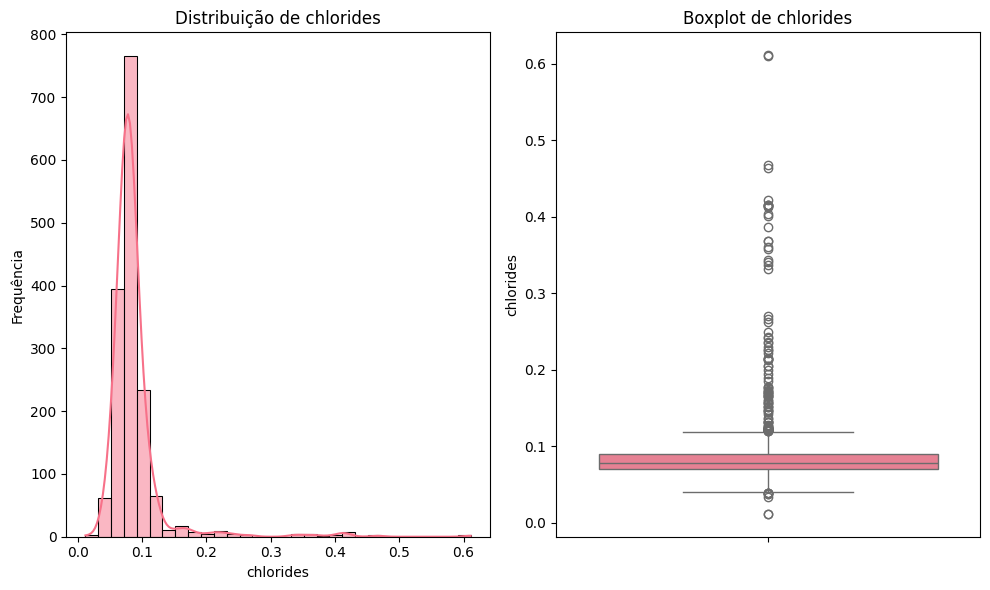


📊 CHLORIDES:
   Média: 0.087
   Mediana: 0.079
   Desvio Padrão: 0.047
   Mín: 0.012 | Máx: 0.611
   Q1: 0.070 | Q3: 0.090
--------------------------------------------------


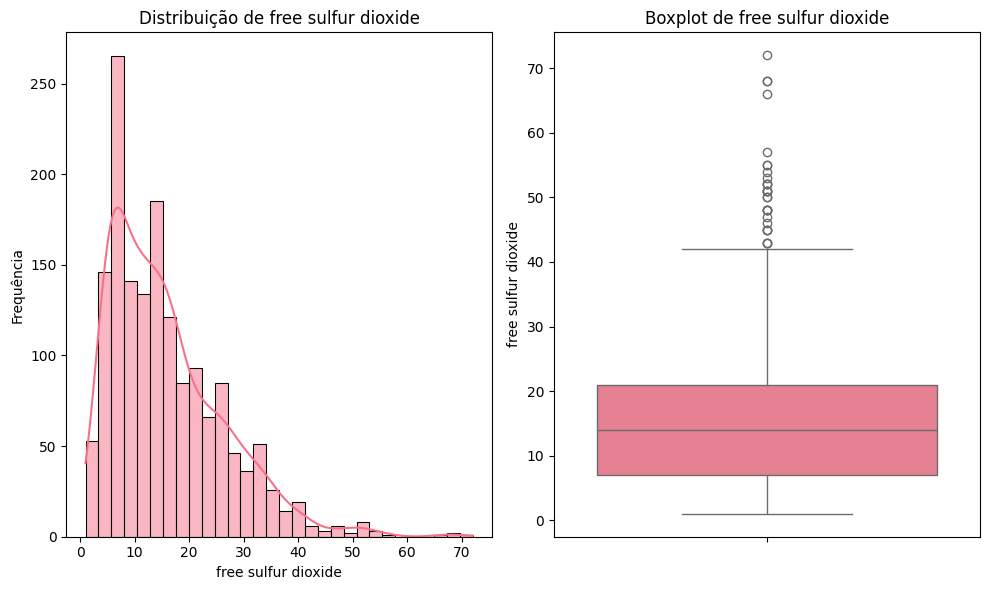


📊 FREE SULFUR DIOXIDE:
   Média: 15.875
   Mediana: 14.000
   Desvio Padrão: 10.460
   Mín: 1.000 | Máx: 72.000
   Q1: 7.000 | Q3: 21.000
--------------------------------------------------


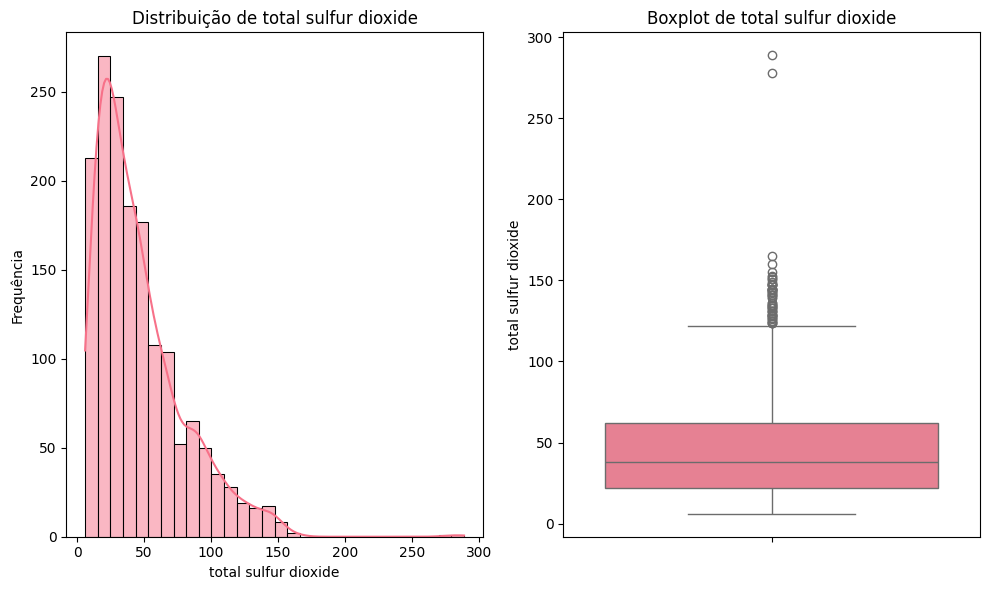


📊 TOTAL SULFUR DIOXIDE:
   Média: 46.468
   Mediana: 38.000
   Desvio Padrão: 32.895
   Mín: 6.000 | Máx: 289.000
   Q1: 22.000 | Q3: 62.000
--------------------------------------------------


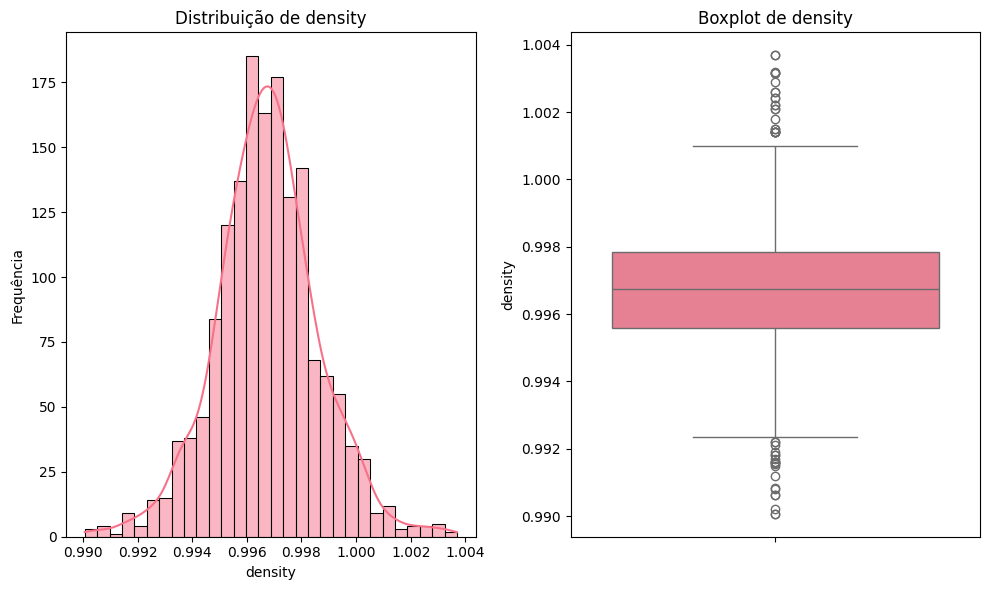


📊 DENSITY:
   Média: 0.997
   Mediana: 0.997
   Desvio Padrão: 0.002
   Mín: 0.990 | Máx: 1.004
   Q1: 0.996 | Q3: 0.998
--------------------------------------------------


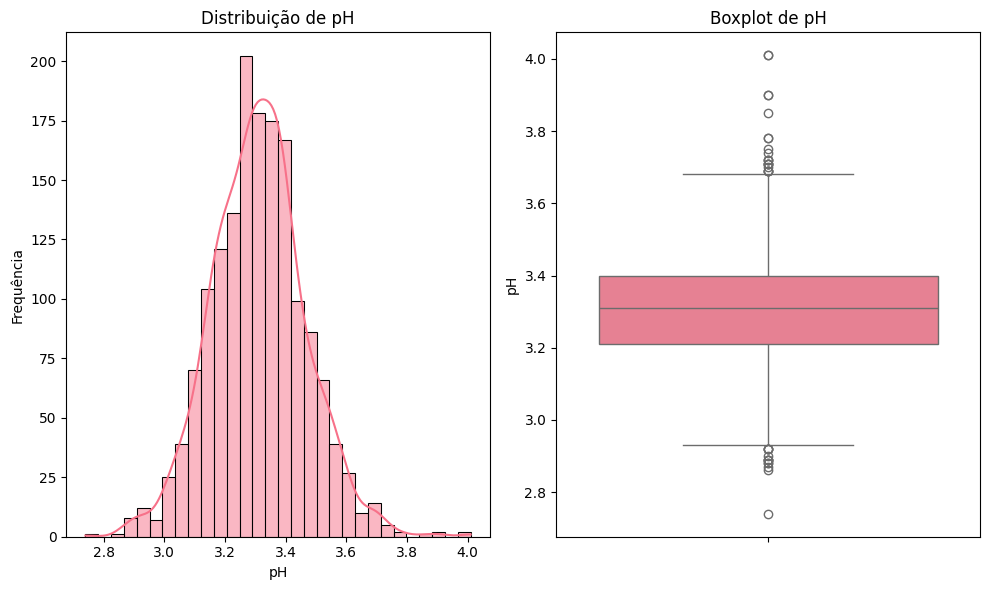


📊 PH:
   Média: 3.311
   Mediana: 3.310
   Desvio Padrão: 0.154
   Mín: 2.740 | Máx: 4.010
   Q1: 3.210 | Q3: 3.400
--------------------------------------------------


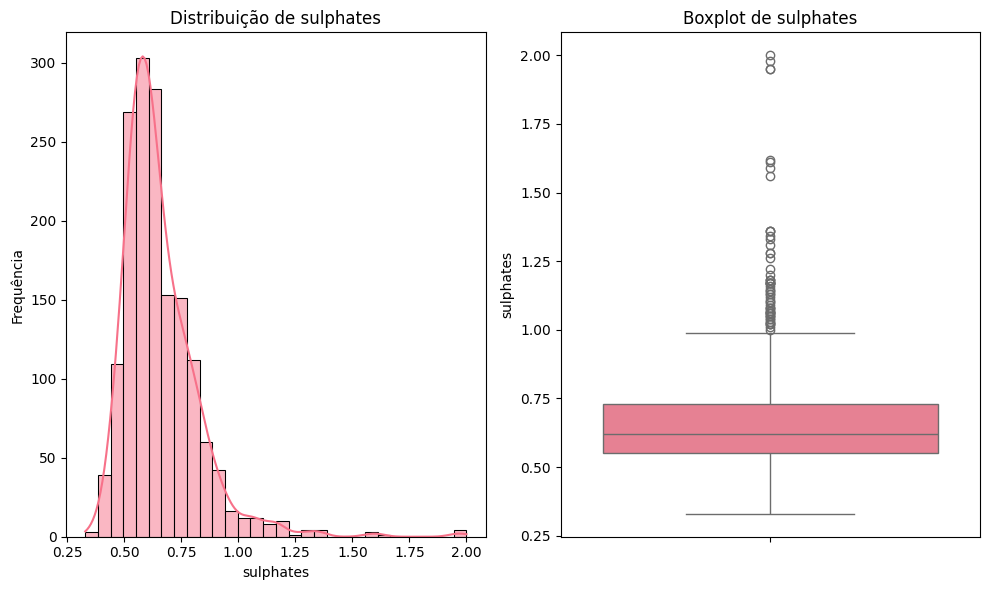


📊 SULPHATES:
   Média: 0.658
   Mediana: 0.620
   Desvio Padrão: 0.170
   Mín: 0.330 | Máx: 2.000
   Q1: 0.550 | Q3: 0.730
--------------------------------------------------


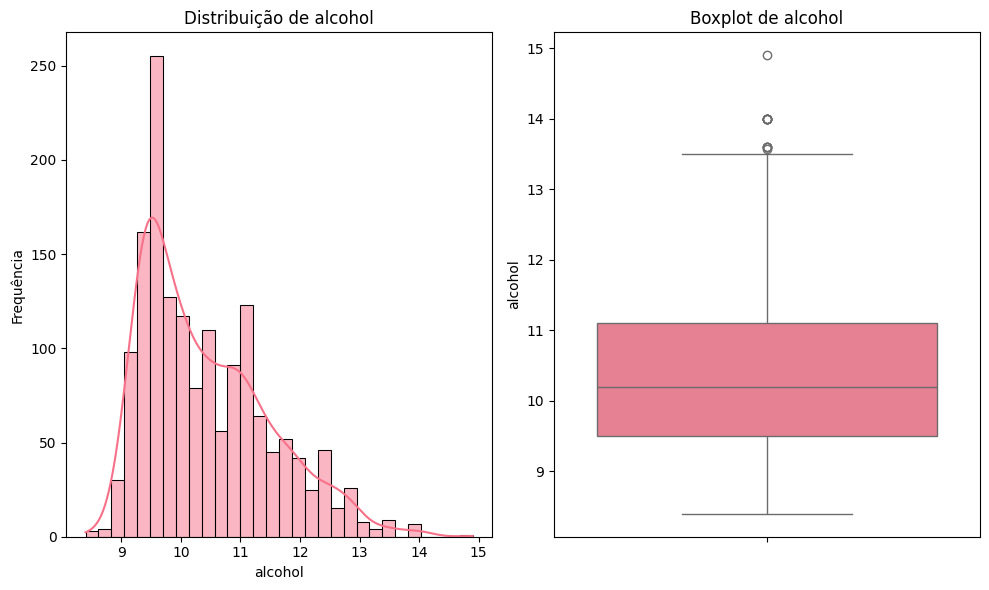


📊 ALCOHOL:
   Média: 10.423
   Mediana: 10.200
   Desvio Padrão: 1.066
   Mín: 8.400 | Máx: 14.900
   Q1: 9.500 | Q3: 11.100
--------------------------------------------------


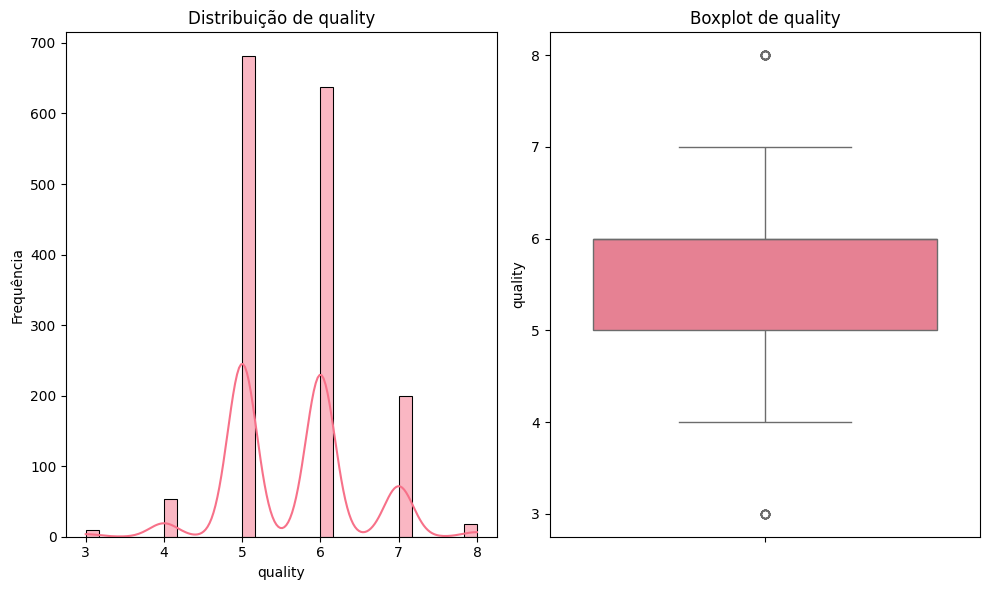


📊 QUALITY:
   Média: 5.636
   Mediana: 6.000
   Desvio Padrão: 0.808
   Mín: 3.000 | Máx: 8.000
   Q1: 5.000 | Q3: 6.000
--------------------------------------------------


In [10]:
# Configuração para melhor visualização
plt.style.use('default')
sns.set_palette("husl")

# Visualização das distribuições de todas as variáveis
print("📈 DISTRIBUIÇÕES DAS VARIÁVEIS")
print("="*40)

for col in df.columns:
    plt.figure(figsize=(10, 6))

    # Subplot 1: Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Subplot 2: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    # Estatísticas básicas
    print(f"\n📊 {col.upper()}:")
    print(f"   Média: {df[col].mean():.3f}")
    print(f"   Mediana: {df[col].median():.3f}")
    print(f"   Desvio Padrão: {df[col].std():.3f}")
    print(f"   Mín: {df[col].min():.3f} | Máx: {df[col].max():.3f}")
    print(f"   Q1: {df[col].quantile(0.25):.3f} | Q3: {df[col].quantile(0.75):.3f}")
    print("-" * 50)


### Análise Específica da Variável Target (Quality)

Vamos focar na variável `quality`, que é nossa variável resposta:


In [11]:
# Análise detalhada da variável quality
print("🎯 ANÁLISE DA VARIÁVEL TARGET (QUALITY)")
print("="*45)

# Tipo de dados
print(f"Tipo de dados: {df['quality'].dtype}")

# Valores únicos
print(f"Valores únicos: {sorted(df['quality'].unique())}")
print(f"Quantidade de valores únicos: {df['quality'].nunique()}")

# Estatísticas descritivas
print(f"\nEstatísticas descritivas:")
print(df['quality'].describe())


🎯 ANÁLISE DA VARIÁVEL TARGET (QUALITY)
Tipo de dados: int64
Valores únicos: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
Quantidade de valores únicos: 6

Estatísticas descritivas:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


In [12]:
# Distribuição detalhada das notas de qualidade
print("\n📊 DISTRIBUIÇÃO DAS NOTAS DE QUALIDADE")
print("="*40)

# Contagem de valores
quality_counts = df['quality'].value_counts().sort_index()
print("Contagem absoluta:")
print(quality_counts)

print("\nContagem relativa (%):")
quality_relative = df['quality'].value_counts(normalize=True).sort_index() * 100
print(quality_relative.round(2))



📊 DISTRIBUIÇÃO DAS NOTAS DE QUALIDADE
Contagem absoluta:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Contagem relativa (%):
quality
3     0.63
4     3.31
5    42.59
6    39.90
7    12.45
8     1.13
Name: proportion, dtype: float64


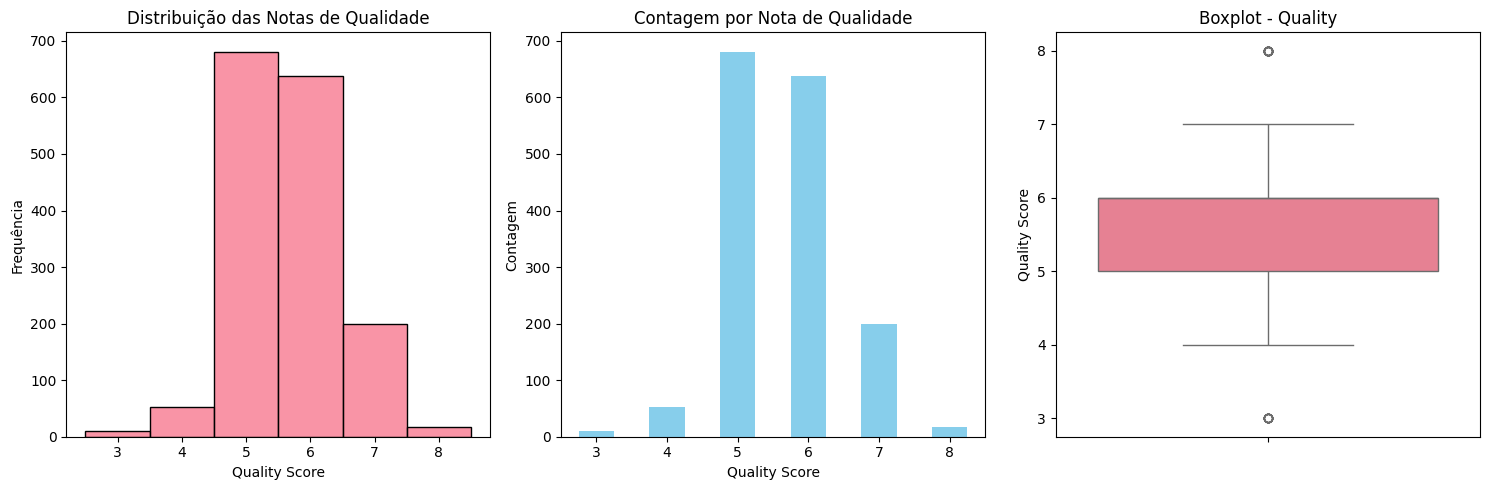

In [13]:
# Visualização da distribuição da variável quality
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 3, 1)
sns.histplot(data=df, x="quality", bins=range(3, 10), discrete=True)
plt.title('Distribuição das Notas de Qualidade')
plt.xlabel('Quality Score')
plt.ylabel('Frequência')

# Gráfico de barras
plt.subplot(1, 3, 2)
quality_counts.plot(kind='bar', color='skyblue')
plt.title('Contagem por Nota de Qualidade')
plt.xlabel('Quality Score')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y="quality")
plt.title('Boxplot - Quality')
plt.ylabel('Quality Score')

plt.tight_layout()
plt.show()


### Análise de Correlação Preliminar

Uma primeira olhada nas correlações entre as variáveis:


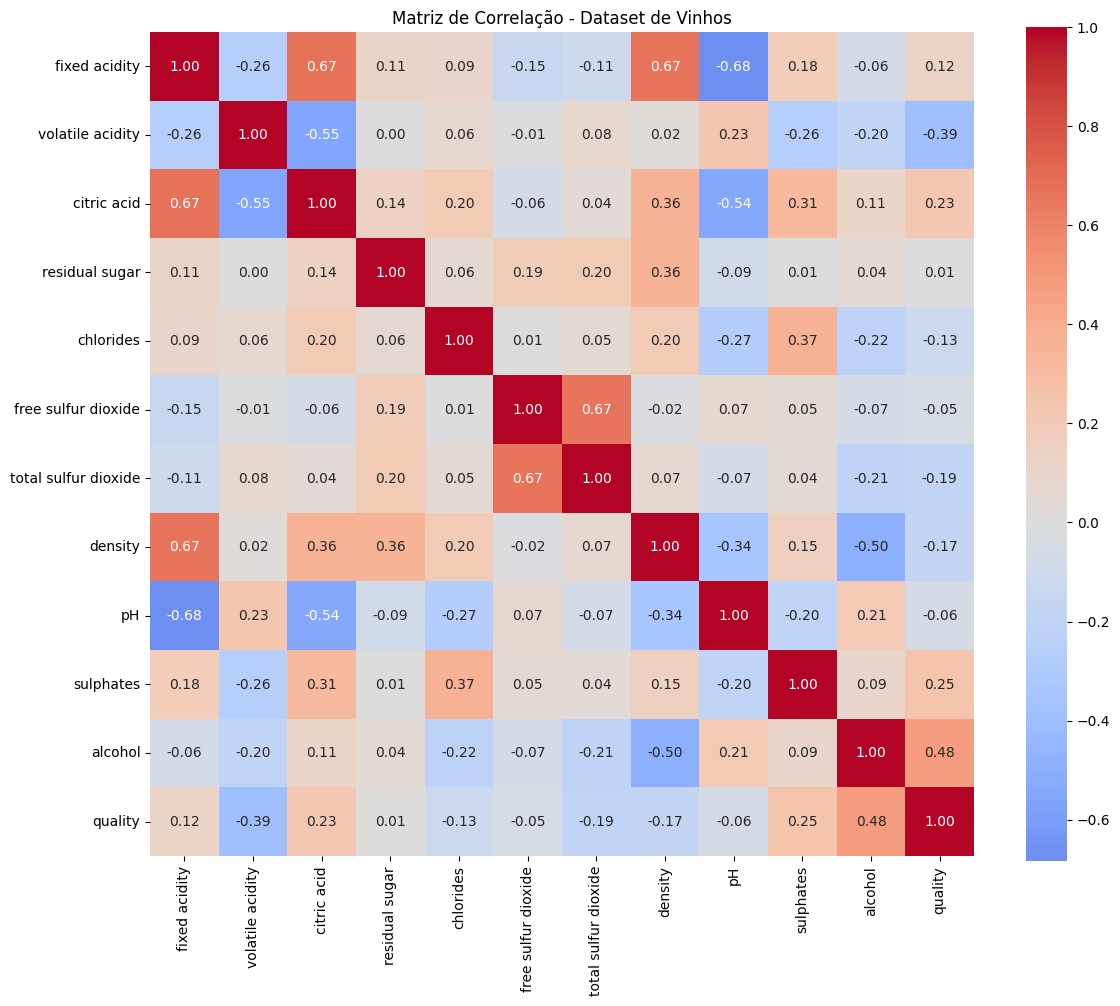


🎯 CORRELAÇÕES COM QUALITY (TARGET)
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [14]:
# Matriz de correlação
correlation_matrix = df.corr()

# Visualização da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f')
plt.title('Matriz de Correlação - Dataset de Vinhos')
plt.tight_layout()
plt.show()

# Correlações com a variável quality
print("\n🎯 CORRELAÇÕES COM QUALITY (TARGET)")
print("="*40)
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_correlations)


### Conclusões da Análise Exploratória Inicial

**📊 Principais Insights dos Dados:**

1. **Dataset bem estruturado**: 1.599 observações, sem valores faltantes
2. **Variável target balanceada**: Notas concentradas entre 5-7 (distribuição normal)
3. **Variáveis com diferentes escalas**: Necessário considerar normalização futura
4. **Correlações identificadas**: Algumas variáveis mostram correlação com quality

**🎯 Próximos Passos:**
- Análise de outliers
- Estudo detalhado da separabilidade das classes
- Transformação da variável target para classificação binária
